<a href="https://colab.research.google.com/github/fishitmo/Takeobds/blob/main/Takeo_Assignment_EDA_IMDb_low_ranked_movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**EDA on IMDb low ranked movies**

The IMDb 100 Lowest Ranked Movies Dataset available on Kaggle is a collection that focuses on the 100 movies with the lowest rankings according to IMDb. This dataset provides a unique perspective on films that, for various reasons, did not resonate well with audiences or critics, in contrast to more typical datasets that focus on highly rated movies.

The dataset includes details such as the titles of the movies, their year of release, genres, duration, country of origin, language, IMDb rating, and the number of votes each movie received. This information is valuable for anyone interested in analyzing trends and patterns among movies that are generally considered to be of lower quality or less popular. It can be particularly useful for studies in film criticism, cultural studies, or data analysis focusing on the entertainment industry.

For more detailed information or to access the dataset, you can visit the Kaggle pages for the EDA-IMDb low ranked movies

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves examining and visualizing data to understand its patterns, distributions, relationships, and potential outliers. The primary goal of EDA is to gain insights into the data, identify patterns, and formulate hypotheses that can guide further analysis or modeling. Here are some key aspects of exploratory data analysis:

1. **Summary Statistics:**
   - Compute basic statistics such as mean, median, mode, standard deviation, and quartiles to describe the central tendency and spread of the data.

2. **Univariate Analysis:**
   - Examine the distribution of individual variables. This may involve creating histograms, box plots, or kernel density plots to visualize the data's shape and identify potential outliers.

3. **Bivariate Analysis:**
   - Explore relationships between pairs of variables. Scatter plots, correlation matrices, and heatmaps are common tools for visualizing the relationship between two variables.

4. **Multivariate Analysis:**
   - If the dataset has more than two variables, multivariate analysis helps to understand complex relationships. Techniques like dimensionality reduction or clustering can be applied to reveal patterns.

5. **Data Cleaning:**
   - Identify and handle missing values, outliers, and anomalies. Cleaning the data ensures that subsequent analyses are based on reliable and accurate information.

6. **Data Visualization:**
   - Utilize visualizations such as bar charts, line plots, pie charts, and others to represent the data in a more understandable and interpretable form. Visualization aids in identifying trends, patterns, and potential outliers.

7. **Feature Engineering:**
   - Derive new features from existing ones or transform variables to make them more suitable for modeling. Feature engineering can enhance the predictive power of a model.

8. **Hypothesis Generation:**
   - Formulate hypotheses about relationships or patterns in the data. These hypotheses can guide further analysis and modeling.

9. **Interactive Exploration:**
   - Use interactive tools and dashboards to explore data dynamically. Tools like Jupyter Notebooks, Tableau, or Plotly can be helpful in creating interactive visualizations.

10. **Documentation:**
    - Document the EDA process thoroughly, including the steps taken, insights gained, and decisions made. Clear documentation facilitates collaboration and future reference.

EDA is an iterative process, and the insights gained can guide subsequent data preprocessing, feature engineering, and model development. It plays a crucial role in understanding the nature of the data and making informed decisions throughout the data analysis pipeline.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#**Data Loading and Preparation:**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving lowest_ranked_movies_data (1).csv to lowest_ranked_movies_data (1).csv


In [3]:
filename = next(iter(uploaded))

In [4]:
# Load your dataset
df = pd.read_csv(filename)

In [5]:
df.head()

,rank,name,year,certification,duration,rating,review_count,director,writer,genre,stars
0,1,Disaster Movie,2008,PG-13,1h 27m,1.9,94K,"['Jason Friedberg', 'Aaron Seltzer']","['Jason Friedberg', 'Aaron Seltzer']","['Comedy', 'Sci-Fi']","['Carmen Electra', 'Vanessa Lachey', 'Nicole P..."
1,2,Manos: The Hands of Fate,1966,Not Rated,1h 10m,1.6,37K,['Harold P. Warren'],['Harold P. Warren'],['Horror'],"['Tom Neyman', 'John Reynolds', 'Diane Adelson']"
2,3,Birdemic: Shock and Terror,2010,Not Rated,1h 45m,1.7,25K,['James Nguyen'],"['Writer', 'James Nguyen', '']","['Horror', 'Thriller']","['Alan Bagh', 'Whitney Moore', 'Tippi Hedren']"
3,4,Superbabies: Baby Geniuses 2,2004,PG,1h 28m,1.5,32K,['Bob Clark'],"['Writers', 'Robert Grasmere', 'Francisca Mato...","['Comedy', 'Family', 'Sci-Fi']","['Jon Voight', 'Scott Baio', 'Vanessa Angel']"
4,5,The Hottie & the Nottie,2008,PG-13,1h 31m,2.0,39K,['Tom Putnam'],['Heidi Ferrer'],"['Comedy', 'Romance']","['Paris Hilton', 'Joel David Moore', 'Christin..."


#**Data Cleaning:**

In [6]:
df.columns

Index(['rank', 'name', 'year', 'certification', 'duration', 'rating',
       'review_count', 'director', 'writer', 'genre', 'stars'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rank           100 non-null    int64  
 1   name           100 non-null    object 
 2   year           100 non-null    int64  
 3   certification  96 non-null     object 
 4   duration       96 non-null     object 
 5   rating         100 non-null    float64
 6   review_count   100 non-null    object 
 7   director       100 non-null    object 
 8   writer         100 non-null    object 
 9   genre          100 non-null    object 
 10  stars          100 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 8.7+ KB


In [8]:
df.isna().sum()

rank             0
name             0
year             0
certification    4
duration         4
rating           0
review_count     0
director         0
writer           0
genre            0
stars            0
dtype: int64

In [9]:
df[df.duration.isna()]

,rank,name,year,certification,duration,rating,review_count,director,writer,genre,stars
36,37,The Cost of Deception,2021,NaN,NaN,1.5,40K,['Keith English'],"['Writer', 'Balázs Bendi', '']","['Action', 'Crime', 'Drama']","['Vivianne Bánovits', 'András Mózes', 'Barna B..."
38,39,Enes Batur: Imagination or Reality?,2018,NaN,NaN,2.0,56K,['Kamil Cetin'],"['Enes Batur', 'Busra Nur Karahan', 'Enver Sül...",['Comedy'],"['Enes Batur', 'Bilal Hanci', 'Atakan Özyurt']"
43,44,Adipurush,2023,NaN,NaN,3.4,131K,['Om Raut'],"['Writers', 'Manoj Muntashir', 'Om Raut', '']","['Action', 'Adventure', 'Drama']","['Kriti Sanon', 'Saif Ali Khan', 'Prabhas']"
71,72,Smolensk,2016,NaN,NaN,1.2,40K,['Antoni Krauze'],"['Writers', 'Antoni Krauze', 'Tomasz Lysiak', ...","['Drama', 'Thriller']","['Beata Fido', 'Maciej Póltorak', 'Aldona Stru..."


In [10]:
df.shape

(100, 11)

In [11]:
df.dropna(inplace=True)

In [12]:
df.shape

(96, 11)

#**Exploratory Analysis:**

In [13]:
df.describe()

,rank,year,rating
count,96.000000,96.00000,96.000000
mean,50.604167,2005.03125,2.903125
std,29.469870,11.48954,0.690302
min,1.000000,1964.00000,1.200000
25%,24.750000,2000.00000,2.500000
50%,51.500000,2006.00000,3.100000
75%,76.250000,2012.25000,3.500000
max,100.000000,2023.00000,3.800000


In [14]:
df.isna().sum()

rank             0
name             0
year             0
certification    0
duration         0
rating           0
review_count     0
director         0
writer           0
genre            0
stars            0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [16]:
df.dtypes

rank               int64
name              object
year               int64
certification     object
duration          object
rating           float64
review_count      object
director          object
writer            object
genre             object
stars             object
dtype: object

In [17]:
df.year.value_counts()

2007    7
2008    5
2003    5
2005    5
2006    5
2014    4
1997    4
2002    4
2020    4
2004    3
2010    3
2000    3
2009    3
2018    3
2019    3
2011    3
1994    3
2022    2
2013    2
1988    2
1996    2
1990    2
1987    2
1998    2
2012    2
2021    2
1970    1
2017    1
2016    1
2015    1
2023    1
1964    1
1966    1
2001    1
1999    1
1989    1
1983    1
Name: year, dtype: int64

In [18]:
df.year.min()

1964

In [19]:
df.year.max()

2023

In [20]:
bins= [1960 ,1980 , 1990 , 2000, 2010, 2020]

df['year_range'] = pd.cut(df['year'], bins = bins, labels= ['1960-1980', '1981-1990', '1991-2000', '2001-2010', '2011-2020'])
range_counts = df['year_range'].value_counts()

In [21]:
range_counts

2001-2010    41
2011-2020    24
1991-2000    15
1981-1990     8
1960-1980     3
Name: year_range, dtype: int64

In [22]:
# plt.figure(figsize= (10,6))
# range_counts.sort_index().plot(kind='bar', color = 'purple')
# plt.title('Distribution of Years in Ranges')
# plt.xlabel('Year Range')
# plt.ylabel('Count')
# plt.show()

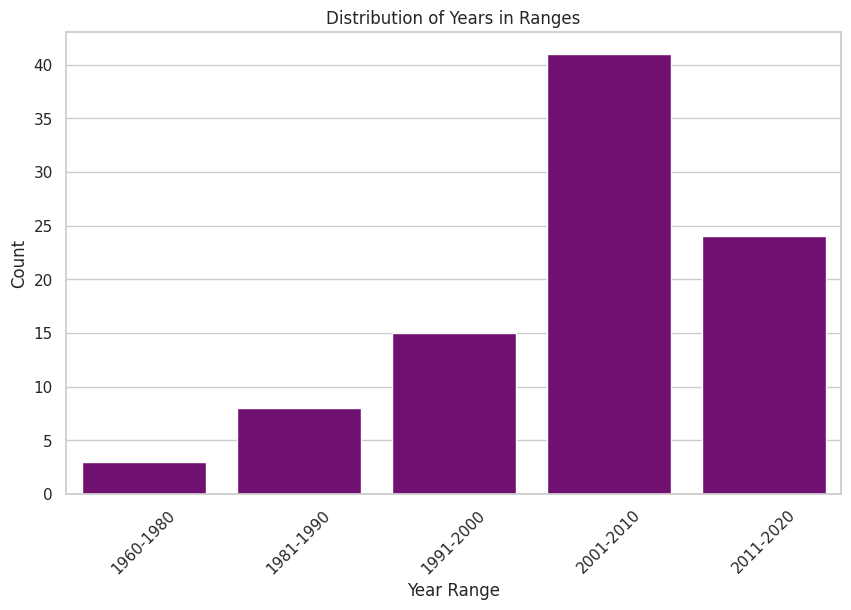

In [23]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=range_counts.index, y=range_counts.values, color='purple')
plt.title('Distribution of Years in Ranges')
plt.xlabel('Year Range')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [24]:
pd.crosstab(df.year_range, df.certification)

certification,G,Not Rated,PG,PG-13,R,TV-MA
year_range,,,,,,
1960-1980,1,2,0,0,0,0
1981-1990,0,1,3,3,1,0
1991-2000,1,0,6,6,2,0
2001-2010,0,4,8,18,11,0
2011-2020,0,5,6,5,5,3


<Figure size 1200x1000 with 0 Axes>

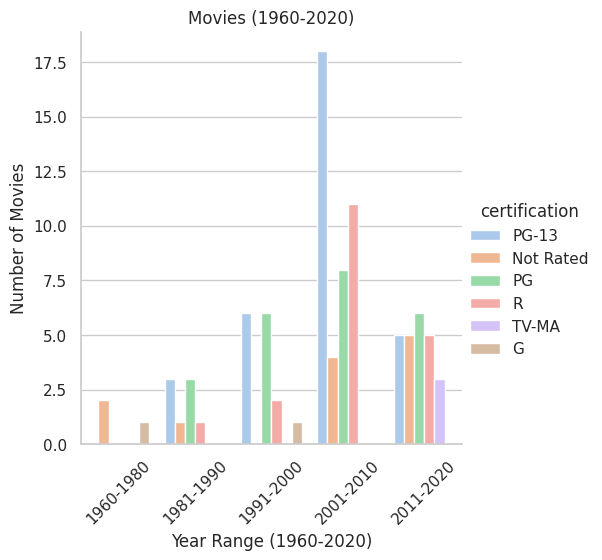

In [25]:
plt.figure(figsize=(12, 10))
sns.catplot(data=df, x='year_range', hue='certification', kind='count', palette='pastel')
plt.xlabel('Year Range (1960-2020)')
plt.ylabel('Number of Movies')
plt.title('Movies (1960-2020)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

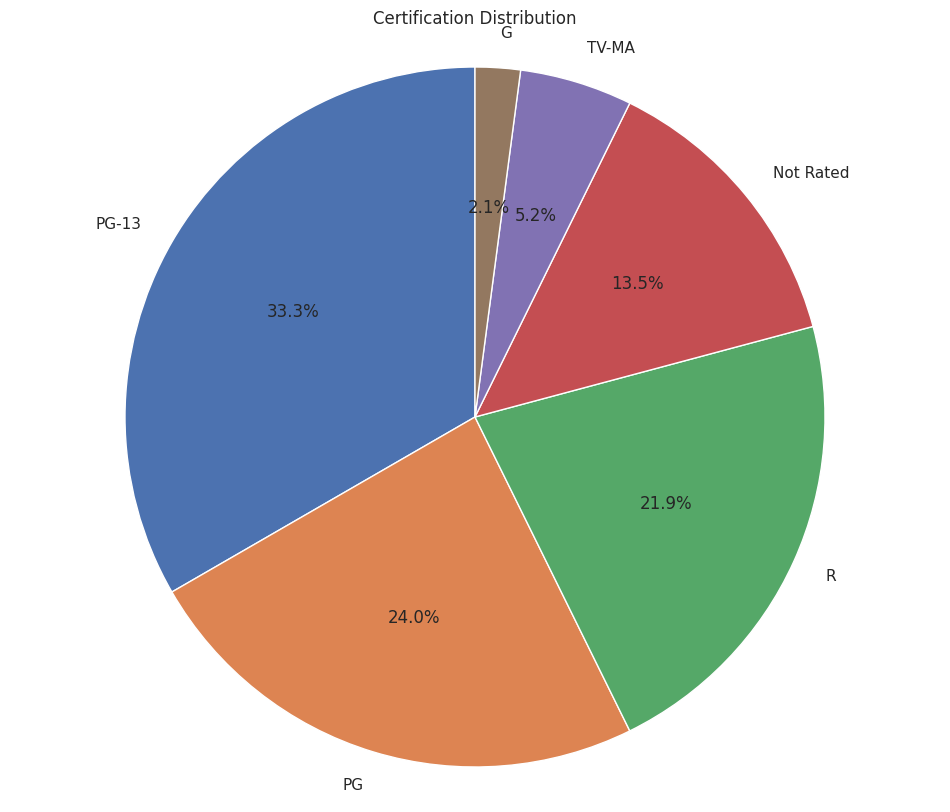

In [26]:
value_counts = df['certification'].value_counts()
plt.figure(figsize=(12, 10))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Certification Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

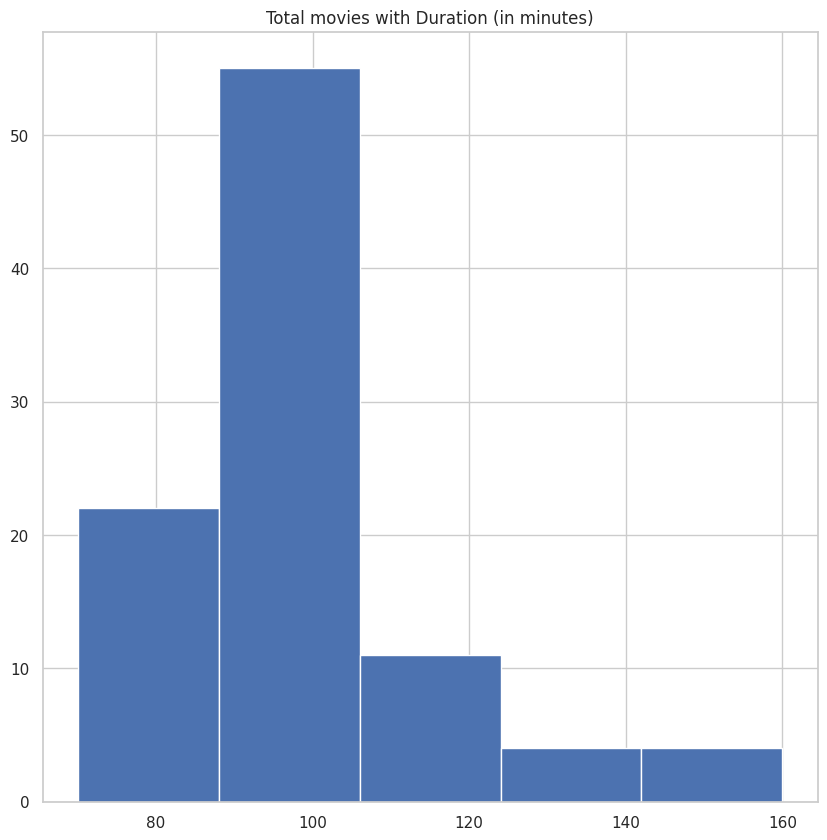

In [27]:
df['duration_minutes'] = df['duration'].apply(lambda x: int(x.split('h')[0]) * 60 + int(x.split(' ')[-1].split('m')[0]))
plt.figure(figsize=(10,10))
plt.hist(df.duration_minutes,bins=5)
plt.title('Total movies with Duration (in minutes)')
plt.show()

<Axes: xlabel='rating', ylabel='Count'>

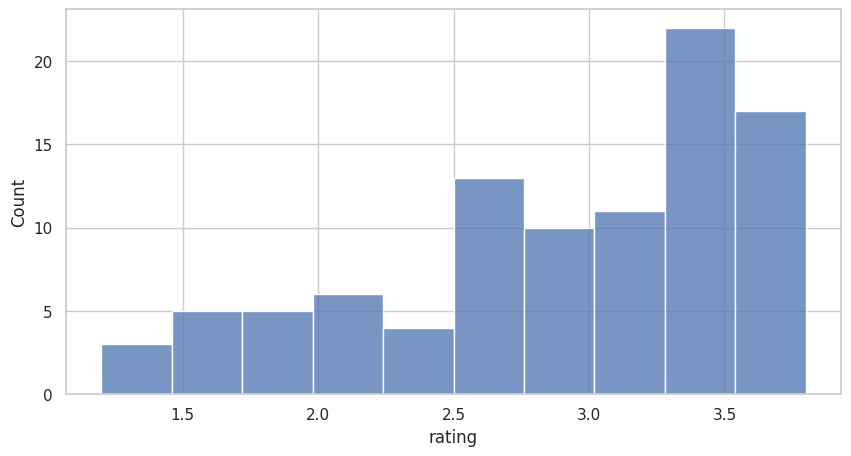

In [28]:
plt.figure(figsize=(10,5))
sns.histplot(data=df,x='rating',bins=10)

In [29]:
print(f'Max rating of movie is {df.rating.max()}')
print(f'Min rating of movie is {df.rating.min()}')

Max rating of movie is 3.8
Min rating of movie is 1.2


**Record that rating is minimum¶**

In [38]:
df.rating.min()

1.2

In [30]:
df[df['rating']==df.rating.min()]

,rank,name,year,certification,duration,rating,review_count,director,writer,genre,stars,year_range,duration_minutes
23,24,Daniel the Wizard,2004,Not Rated,1h 21m,1.2,15K,['Ulli Lommel'],['Ulli Lommel'],"['Comedy', 'Crime', 'Fantasy']","['Daniel Küblböck', 'Ulli Lommel', 'Rudolf Wal...",2001-2010,81


**Records that rating is maximum**

In [36]:
df.rating.max()

3.8

In [31]:
df[df['rating']==df.rating.max()]

,rank,name,year,certification,duration,rating,review_count,director,writer,genre,stars,year_range,duration_minutes
74,75,Batman & Robin,1997,PG-13,2h 5m,3.8,264K,['Joel Schumacher'],"['Bob Kane', 'Akiva Goldsman']","['Action', 'Sci-Fi']","['Arnold Schwarzenegger', 'George Clooney', ""C...",1991-2000,125
85,86,The Wicker Man,2006,PG-13,1h 42m,3.8,71K,['Neil LaBute'],"['Neil LaBute', 'Anthony Shaffer']","['Horror', 'Mystery', 'Thriller']","['Nicolas Cage', 'Ellen Burstyn', 'Leelee Sobi...",2001-2010,102
92,93,Piranha 3DD,2012,R,1h 23m,3.8,45K,['John Gulager'],"['Writers', 'Patrick Melton', 'Marcus Dunstan'...","['Comedy', 'Horror', 'Sci-Fi']","['Danielle Panabaker', 'Ving Rhames', 'David H...",2011-2020,83
95,96,The Love Guru,2008,PG-13,1h 27m,3.8,54K,['Marco Schnabel'],"['Mike Myers', 'Graham Gordy']","['Comedy', 'Romance', 'Sport']","['Mike Myers', 'Jessica Alba', 'Romany Malco']",2001-2010,87
97,98,In the Name of the King: A Dungeon Siege Tale,2007,PG-13,2h 7m,3.8,51K,['Uwe Boll'],"['Writers', 'Doug Taylor', 'Jason Rappaport', ...","['Action', 'Adventure', 'Fantasy']","['Jason Statham', 'Ron Perlman', 'Ray Liotta']",2001-2010,127
98,99,The Avengers,1998,PG-13,1h 29m,3.8,45K,['Jeremiah S. Chechik'],"['Sydney Newman', 'Don MacPherson']","['Action', 'Adventure', 'Sci-Fi']","['Ralph Fiennes', 'Uma Thurman', 'Sean Connery']",1991-2000,89


In [39]:
len(df[df['rating']==df.rating.max()])

6

In [43]:
df.review_count

0     94K
1     37K
2     25K
3     32K
4     39K
     ... 
95    54K
96    16K
97    51K
98    45K
99    25K
Name: review_count, Length: 96, dtype: object

In [46]:
df['review_count'] = pd.to_numeric(df['review_count'].str.replace('K',''))*1000
df.head(3)

,rank,name,year,certification,duration,rating,review_count,director,writer,genre,stars,year_range,duration_minutes
0,1,Disaster Movie,2008,PG-13,1h 27m,1.9,94000,"['Jason Friedberg', 'Aaron Seltzer']","['Jason Friedberg', 'Aaron Seltzer']","['Comedy', 'Sci-Fi']","['Carmen Electra', 'Vanessa Lachey', 'Nicole P...",2001-2010,87
1,2,Manos: The Hands of Fate,1966,Not Rated,1h 10m,1.6,37000,['Harold P. Warren'],['Harold P. Warren'],['Horror'],"['Tom Neyman', 'John Reynolds', 'Diane Adelson']",1960-1980,70
2,3,Birdemic: Shock and Terror,2010,Not Rated,1h 45m,1.7,25000,['James Nguyen'],"['Writer', 'James Nguyen', '']","['Horror', 'Thriller']","['Alan Bagh', 'Whitney Moore', 'Tippi Hedren']",2001-2010,105


In [48]:
df.review_count.dtype

dtype('int64')

In [50]:
df.loc[:,['rating','review_count']]

,rating,review_count
0,1.9,94000
1,1.6,37000
2,1.7,25000
3,1.5,32000
4,2.0,39000
...,...,...
95,3.8,54000
96,3.5,16000
97,3.8,51000
98,3.8,45000


<ipython-input-51-98bce352526d>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='rating', y = 'review_count', data= df, palette= 'BuGn')


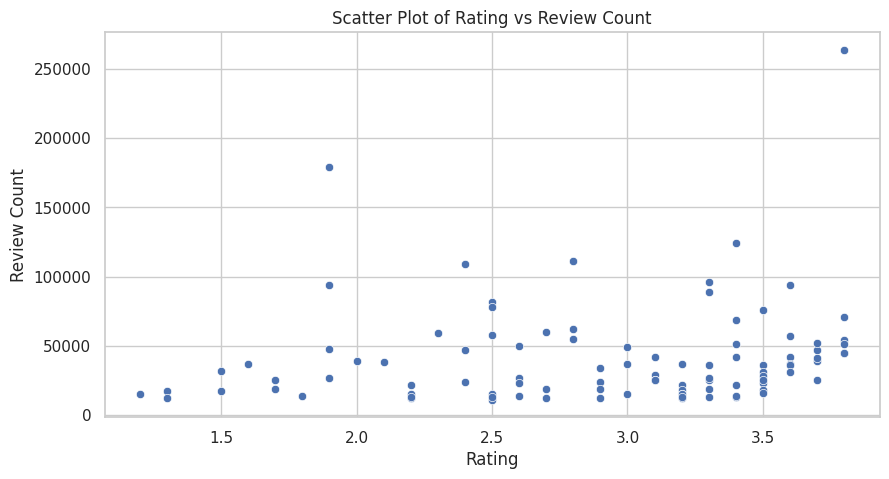

In [51]:
plt.figure(figsize= (10,5))
sns.scatterplot(x='rating', y = 'review_count', data= df, palette= 'BuGn')
plt.title('Scatter Plot of Rating vs Review Count')
plt.xlabel('Rating')
plt.ylabel('Review Count')
plt.show()

In [56]:
import ast
from collections import defaultdict

In [57]:
genre_count_dict = defaultdict(int)

for i in df['genre']:
  genres = ast.literal_eval(i)
  for genre in genres:
    genre_count_dict[genre]+=1

In [58]:
genre_count_dict

defaultdict(int,
            {'Comedy': 51,
             'Sci-Fi': 18,
             'Horror': 26,
             'Thriller': 15,
             'Family': 14,
             'Romance': 11,
             'Action': 33,
             'Adventure': 28,
             'Fantasy': 16,
             'Crime': 10,
             'Musical': 2,
             'Animation': 2,
             'Drama': 10,
             'Music': 3,
             'Mystery': 7,
             'Sport': 4})

<function matplotlib.pyplot.show(close=None, block=None)>

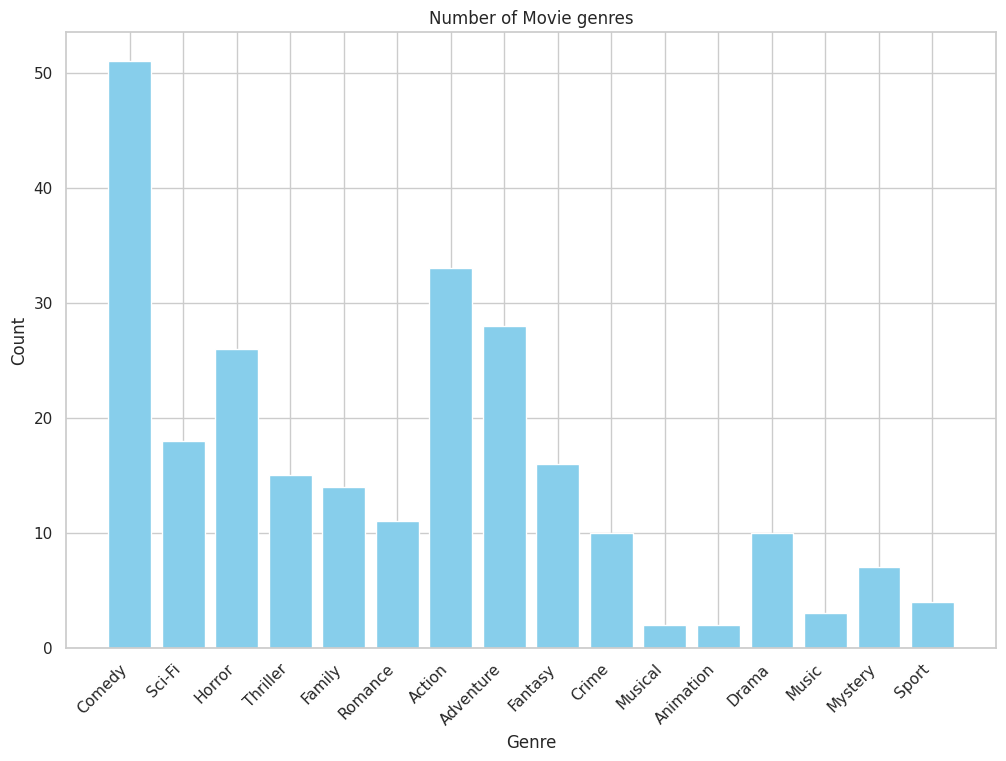

In [61]:
genres, counts = zip(*genre_count_dict.items())
plt.figure(figsize=(12,8))
plt.bar(genres,counts, color = 'skyblue')
plt.title('Number of Movie genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation= 45, ha= 'right')
plt.show

In [62]:
actor_count_dict = defaultdict(int)
for i in df['stars']:
  star = ast.literal_eval(i)
  for j in star:
    actor_count_dict[j]+=1

In [71]:
# actor_count_dict

In [69]:
max_actor , max_count = max(actor_count_dict.items(), key= lambda x:x[1])
print(f'the actor with the maximum count is {max_actor} with {max_count} appearances.')

the actor with the maximum count is Fred Willard with 3 appearances.


In [72]:
min_actor , min_count = min(actor_count_dict.items(), key= lambda x:x[1])
print(f'the actor with the minimum count is {min_actor} with {min_count} appearances.')

the actor with the minimum count is Vanessa Lachey with 1 appearances.
